In [139]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [140]:
results = {}

### Data Preprocessing

In [141]:
df = pd.read_csv('iris.data')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [142]:
dummy_df = pd.get_dummies(df['species']).astype(int)
dummy_df.head(5)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [143]:
merged_df = pd.merge(df,dummy_df,left_index=True,right_index=True)
merged_df.drop(['species'],axis =1 ,inplace=True)
merged_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
0,4.9,3.0,1.4,0.2,1,0,0
1,4.7,3.2,1.3,0.2,1,0,0
2,4.6,3.1,1.5,0.2,1,0,0
3,5.0,3.6,1.4,0.2,1,0,0
4,5.4,3.9,1.7,0.4,1,0,0


In [144]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Logistic Regression 

In [146]:
logreg_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

In [147]:
logreg_model.fit(X_train, y_train)
y_pred1 = logreg_model.predict(X_test)
print(round( accuracy_score(y_test, y_pred1)*100,2),'%')
results['logistic'] = round( accuracy_score(y_test, y_pred1)*100,2)


93.33 %


### K-NN Model

In [148]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [149]:
knn_model.fit(X_train,y_train)
y_pred2 = knn_model.predict(X_test)
print(round(accuracy_score(y_test, y_pred2)*100,2),'%')
results['KNN'] = round(accuracy_score(y_test, y_pred2)*100,2)

96.67 %


### SVM (Support vector machine)

In [150]:
from sklearn.svm import SVC

##### Linear Kernel

In [151]:
svc_model1 = SVC(kernel='linear',random_state=1)
svc_model1.fit(X_train,y_train)
y_pred3 = svc_model1.predict(X_test)
print(accuracy_score(y_test,y_pred3)*100,'%')
results['SVC-linear'] = round(accuracy_score(y_test,y_pred3)*100,2)

100.0 %


##### rbf kernel

In [152]:
scv_model2 = SVC(kernel='rbf',random_state=0)
scv_model2.fit(X_train,y_train)
y_pred4 = scv_model2.predict(X_test)
print(round(accuracy_score(y_test,y_pred4)*100,2),'%')
results['SVC-rbf'] = round(accuracy_score(y_test,y_pred4)*100,2)

96.67 %


### Decision Tree Classification

In [153]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini',random_state=1)
tree_model.fit(X_train,y_train)
y_pred5 = tree_model.predict(X_test)
print(round(accuracy_score(y_test,y_pred5)*100,2),'%')
results['Decision Tree'] = round(accuracy_score(y_test,y_pred5)*100,2)

93.33 %


### Random Forest Tree Classification

In [154]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=10,criterion='gini',random_state=1)
forest_model.fit(X_train,y_train)
y_pred5 = forest_model.predict(X_test)
print(round(accuracy_score(y_test,y_pred5)*100,2),'%')
results['Random Forest'] = round(accuracy_score(y_test,y_pred5)*100,2)

90.0 %


### Comparision of All models 

In [155]:
passing = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
passing.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,SVC-linear,100.00
1,KNN,96.67
3,SVC-rbf,96.67
0,logistic,93.33
4,Decision Tree,93.33
5,Random Forest,90.00


### 4D ploting

In [156]:
temp = df.copy()

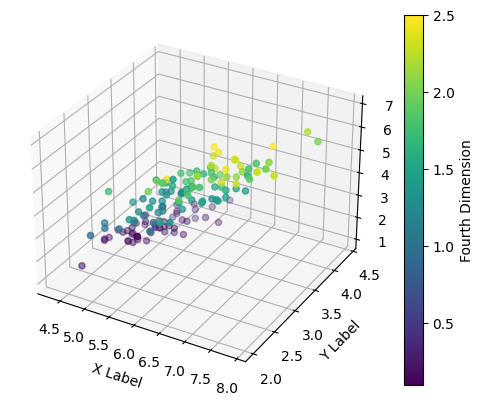

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x = temp['sepal_length'].to_numpy()
y = temp['sepal_width'].to_numpy()
z = temp['petal_length'].to_numpy()
w = temp['petal_width'].to_numpy()

# Create a 3D scatter plot with color mapping based on the fourth dimension
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=w, cmap='viridis', marker='o')
plt.colorbar(scatter, label='Fourth Dimension')

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

